# Australia's Energy Revolution: Decoding the Climate Battle Through Power Generation Data

## The Critical Energy Crossroads
Australia stands at a pivotal moment in its environmental history. As extreme weather events intensify and global climate commitments demand urgent action, the nation's electricity grid has become the primary battlefield for climate change mitigation. This analysis dissects real-time National Electricity Market (NEM) data to reveal the dramatic energy transformation unfolding across Australian states.

## The Data That Tells the Climate Story
**Dataset**: NEM Fuelmix Annual Data (July 2025) - the most current snapshot of Australia's energy reality
**Scope**: National Electricity Market covering 80% of Australia's electricity consumption
**Critical Variables**: State-level energy generation by fuel type, temporal patterns, renewable penetration rates

**The Stakes**: Every megawatt shift from coal to renewables represents tonnes of CO2 prevented from entering the atmosphere. This isn't just energy data - it's a real-time climate action tracker showing whether Australia can achieve net-zero emissions by 2050.

The renewable revolution is happening now, and the data reveals which states are leading the charge and which are falling behind in the race against climate catastrophe.

In [1]:
# import the necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
raw_data = pd.read_csv('../data/nem_fuelmix_annual-data-july2025.csv')

# put in initial graphic or filtering
# categorise fuel types into renewa{'ble and non-renewable
data = raw_data.copy()
renewables = {'Battery', 'Biomass', 'Hydro', 'Solar', 'Wind'}
data['category'] = data['Fuel Type'].apply(lambda x: 'Renewable' if x in renewables else 'Non-Renewable')

# formalise all column names
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

# format the data
data['datetime'] = pd.to_datetime(data['datetime'], dayfirst=True)

# reorder columns for clarity
cols = ['state', 'datetime', 'fuel_type', 'category', 'supply']
data = data[cols]


## Data Architecture: Building the Foundation for Climate Intelligence

### The Binary Climate Classification System
The analysis employs a strategic binary classification that cuts through energy complexity to reveal climate impact. Every fuel source is categorized as either **climate-friendly** (renewable) or **climate-destructive** (fossil fuel). This stark classification reflects the urgent reality: there is no middle ground in the climate crisis.

### Methodological Precision:
- **Renewable Arsenal**: Battery storage, Biomass, Hydro, Solar, Wind - technologies that harvest energy without atmospheric carbon release
- **Fossil Fuel Legacy**: Black Coal, Brown Coal, Gas, Liquid Fuel - carbon-intensive sources driving climate change
- **Data Standardization**: Column normalization and datetime optimization enable temporal trend analysis crucial for tracking transition velocity

### The Climate Analytics Framework:
This preprocessing creates the analytical foundation for answering critical questions: Is Australia's energy transition accelerating fast enough? Which states are climate leaders versus laggards? Where are the biggest opportunities for immediate emissions reduction?

Every data point represents a moment in Australia's climate future - success or failure in this energy transition will determine the livability of the continent for future generations.

In [2]:
data.info()
data.sample(3)
#data['fuel_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      1612 non-null   object        
 1   datetime   1612 non-null   datetime64[ns]
 2   fuel_type  1612 non-null   object        
 3   category   1612 non-null   object        
 4   supply     1612 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ KB


,state,datetime,fuel_type,category,supply
347,NSW,2024-10-12,Other,Non-Renewable,595.272
1095,QLD,2025-03-29,Biomass,Renewable,0.000
1574,TAS,2025-07-12,Wind,Renewable,57150.006


## NSW: The Megacity's Climate Challenge

### Australia's Energy Epicenter Under the Microscope
New South Wales isn't just Australia's most populous state - it's the energy consumption giant that could make or break the nation's climate commitments. Home to Sydney's 5+ million residents and massive industrial operations, NSW's energy choices ripple through the entire Australian economy and carbon footprint.

### The High-Stakes Energy Drama:
NSW represents the ultimate test case: Can a heavily industrialized, coal-dependent region successfully transition to clean energy while maintaining economic prosperity? The state's energy transformation directly impacts:
- **Climate Goals**: NSW's success determines if Australia meets Paris Agreement commitments
- **Economic Future**: Clean energy transition affects jobs, investment, and competitiveness
- **Social Justice**: Energy transition must maintain affordable, reliable power for all communities

### Analysis Methodology:
Using temporal trend visualization to track the renewable vs. fossil fuel battle in real-time. Every upward trend in renewables represents climate progress; every coal spike represents setback. The visualization reveals whether NSW is on track for climate success or headed for environmental disaster.

**The Question**: Is NSW's renewable revolution happening fast enough to avoid climate catastrophe?

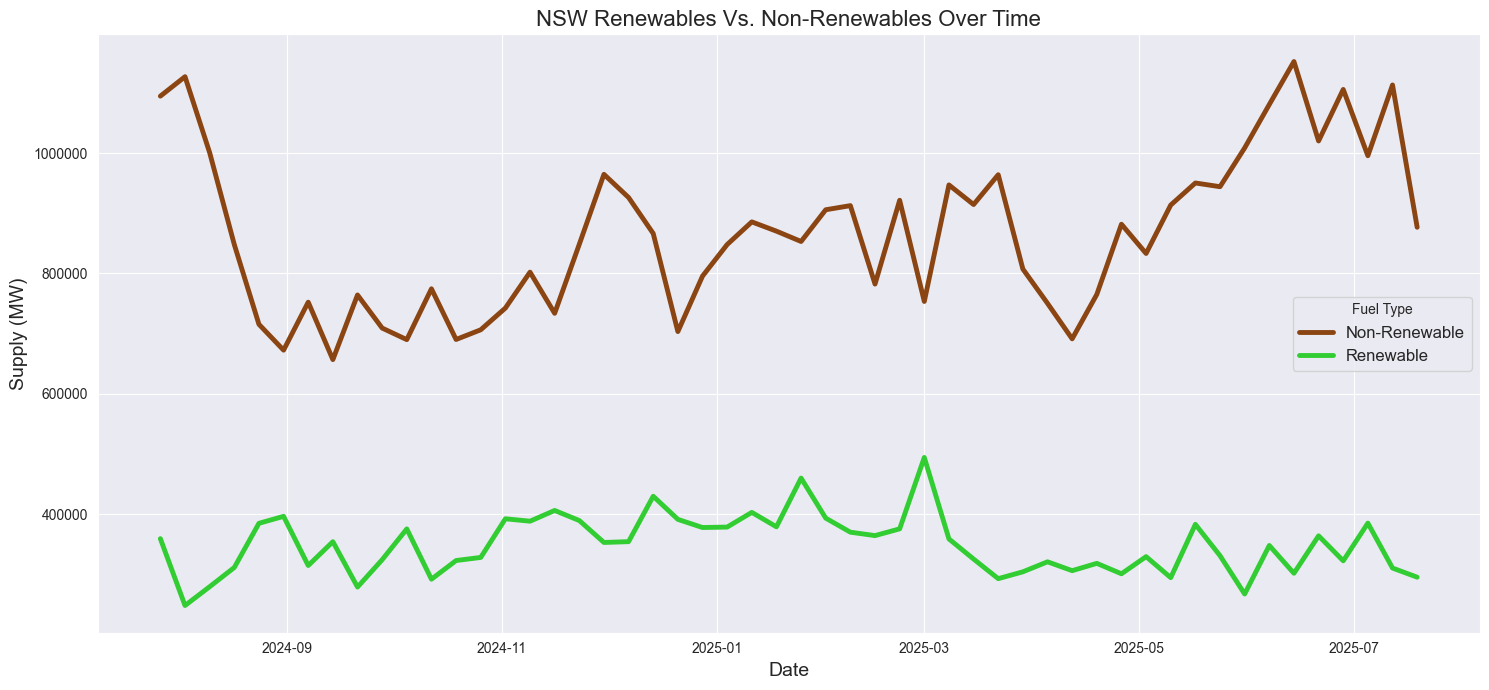

In [3]:
# build chart to fuel mix for nsw to show change over time
# refresh data
df = data.copy()

# filter for NSW and create pivot table for graphing
nsw = df[df['state'] == 'NSW']
nsw_pivot = nsw.pivot_table(index='datetime', columns='category', values='supply', aggfunc='sum').fillna(0)
                                                                                                          
# build plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
palette = {'Renewable': 'limegreen', 'Non-Renewable': 'saddlebrown'}

# plot it
sns.lineplot(data=nsw_pivot, palette=palette, linewidth=3.5, dashes=False)

# finishing touches
plt.title('NSW Renewables Vs. Non-Renewables Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12)
plt.tight_layout()
plt.show()

## Technology Wars: The Granular Battle for Australia's Energy Future

### Beyond Binary: The Multi-Front Climate Campaign
While renewable vs. fossil fuel provides the strategic overview, the real climate battle is fought technology by technology. Each energy source represents a different weapon in the climate war - solar's relentless expansion, wind's growing dominance, coal's stubborn resistance, and gas's complex role as both transition fuel and climate threat.

### The Technological Battlefield:
**Clean Energy Champions:**
- **Solar**: Australia's abundant sunshine converted to zero-carbon electricity
- **Wind**: Coastal and inland wind resources driving emissions reduction
- **Hydro**: Established carbon-free baseload providing grid stability
- **Battery**: Revolutionary storage enabling renewable grid integration
- **Biomass**: Circular economy energy from organic waste

**Carbon-Intensive Legacy Forces:**
- **Black Coal**: The traditional energy backbone now threatening climate stability
- **Brown Coal**: Victoria's emissions-intensive power source requiring urgent replacement
- **Gas**: The controversial "bridge fuel" that may become a climate bridge to nowhere

### Strategic Intelligence:
This granular analysis reveals which clean technologies are winning market share and which fossil fuels are proving most resistant to displacement. Understanding these micro-battles enables targeted policy interventions and investment strategies for accelerating the transition.

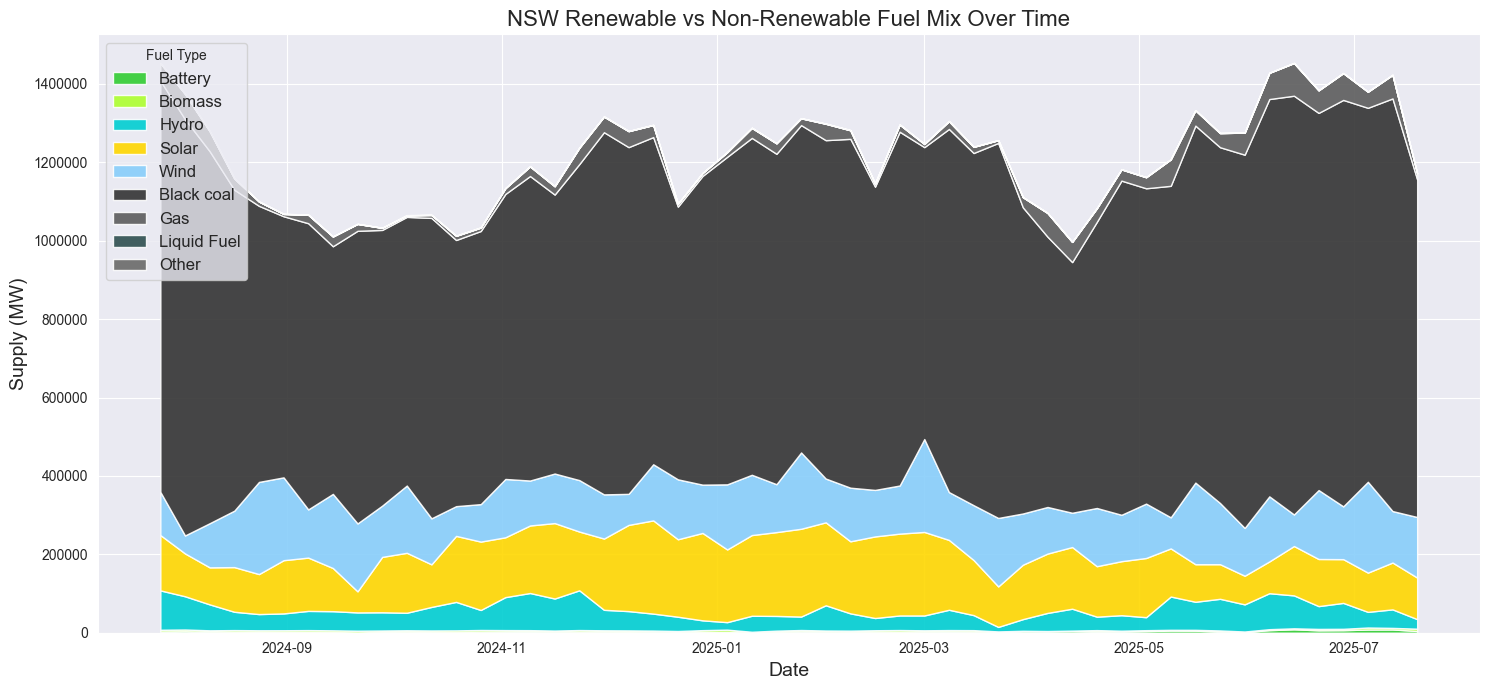

In [4]:
# Categorise fuel types
renewables = data[data['category'] == 'Renewable']['fuel_type'].unique().tolist()
non_renewables = data[data['category'] == 'Non-Renewable']['fuel_type'].unique().tolist()
fuel_order = renewables + non_renewables

# Custom color palette: bright for renewables, dark for non-renewables
color_map = {
    'Battery': '#32CD32',        # limegreen
    'Biomass': '#ADFF2F',        # greenyellow
    'Hydro': '#00CED1',          # darkturquoise
    'Solar': '#FFD700',          # gold
    'Wind': '#87CEFA',           # lightskyblue

    'Black coal': '#333333',     # dark gray
    'Brown coal': '#4B3621',     # dark brown
    'Gas': '#5C5C5C',            # steel gray
    'Liquid Fuel': '#2F4F4F',    # dark slate gray
    'Other': '#696969'           # dim gray
}

# Pivot NSW data by datetime and fuel type
pivot = nsw.pivot_table(index='datetime', columns='fuel_type', values='supply', aggfunc='sum')

# Reorder columns to show renewables first, non-renewables on top
pivot = pivot.fillna(0)[[col for col in fuel_order if col in pivot.columns]]

# Assign colors to each fuel type in order
colors = [color_map[fuel] for fuel in pivot.columns]

# Plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))

plt.stackplot(
    pivot.index,
    [pivot[col] for col in pivot.columns],
    labels=pivot.columns,
    colors=colors,
    alpha=0.9
)

# Final plot formatting
plt.title('NSW Renewable vs Non-Renewable Fuel Mix Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


## Victoria: The Brown Coal Dilemma and Climate Redemption Story

### From Climate Villain to Climate Hero?
Victoria presents the most dramatic climate transformation story in Australia. Historically the nation's worst carbon polluter due to its reliance on brown coal - the dirtiest fossil fuel on Earth - Victoria's energy transition represents a potential climate redemption arc of global significance.

### The Brown Coal Challenge:
**Climate Impact**: Brown coal produces approximately 30% more CO2 than black coal and 70% more than natural gas. Victoria's Latrobe Valley brown coal plants have been among Australia's largest single sources of greenhouse gas emissions, making the state's transition critically important for national climate goals.

### The Transformation Imperative:
- **Climate Justice**: Communities around brown coal plants suffer from air pollution and health impacts
- **Economic Transition**: Coal-dependent regions require just transition support for workers and communities
- **Grid Stability**: Replacing baseload brown coal requires sophisticated renewable + storage solutions
- **International Reputation**: Victoria's success or failure affects Australia's global climate credibility

### Comparative Climate Analysis:
Contrasting Victoria with NSW reveals different transition pathways - Victoria must overcome heavier carbon intensity while NSW faces different challenges with black coal and urban energy demand. This comparison illuminates how diverse Australian states can pursue different but complementary paths to climate success.

**The Ultimate Question**: Can Australia's worst climate polluter become a clean energy success story?

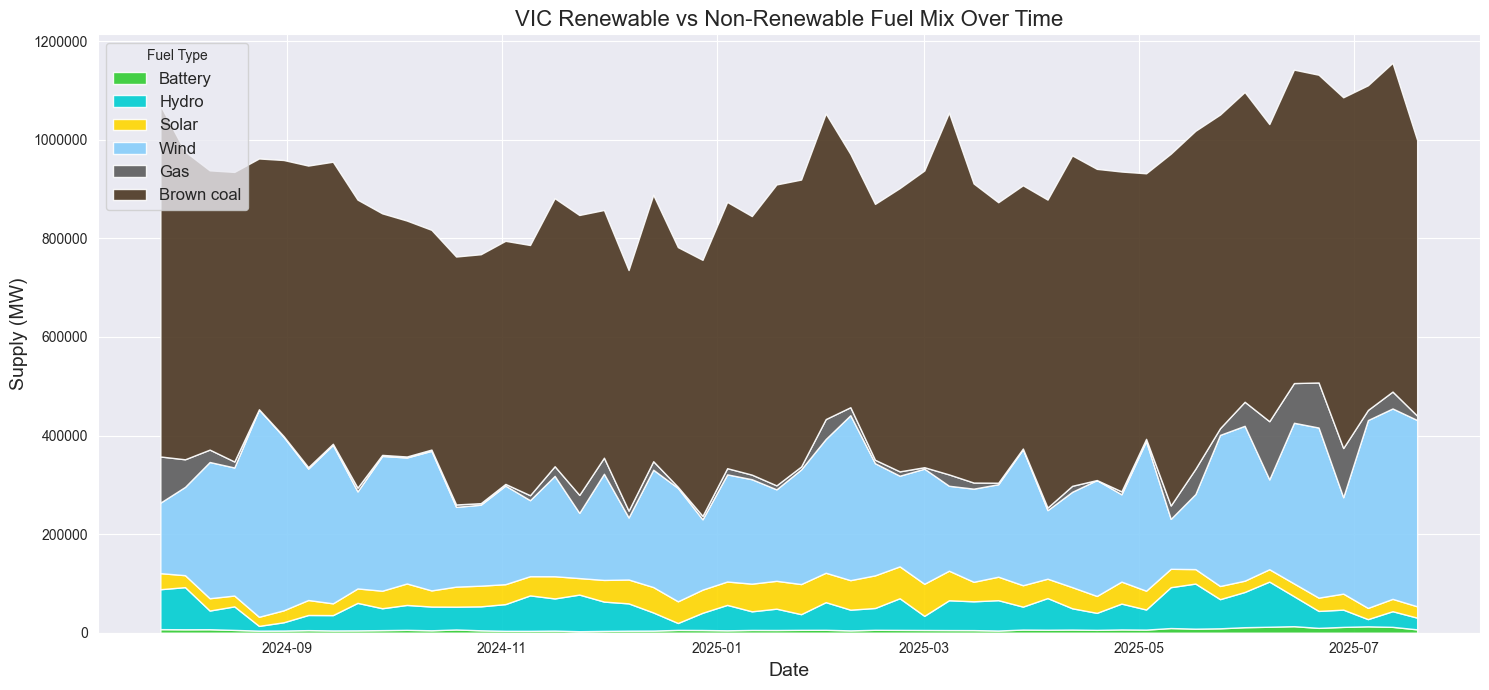

In [6]:
# refresh data
df = data.copy()

# filter for NSW and create pivot table for graphing
vic = df[df['state'] == 'VIC']
vic_pivot = vic.pivot_table(index='datetime', columns='category', values='supply', aggfunc='sum').fillna(0)


pivot = vic.pivot_table(index='datetime', columns='fuel_type', values='supply', aggfunc='sum')

# Reorder columns to show renewables first, non-renewables on top
pivot = pivot.fillna(0)[[col for col in fuel_order if col in pivot.columns]]

# Assign colors to each fuel type in order
colors = [color_map[fuel] for fuel in pivot.columns]

# Plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))

plt.stackplot(
    pivot.index,
    [pivot[col] for col in pivot.columns],
    labels=pivot.columns,
    colors=colors,
    alpha=0.9
)

# Final plot formatting
plt.title('VIC Renewable vs Non-Renewable Fuel Mix Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


## Climate Reality Check: What the Data Reveals About Australia's Energy Future

### The Transition Verdict
This analysis has exposed the raw reality of Australia's energy transformation through hard data rather than political rhetoric. The temporal patterns in NSW and Victoria reveal whether Australia's renewable revolution is genuine progress or mere greenwashing, whether the pace of change matches the urgency of the climate crisis.

### Critical Climate Insights:
**Progress Indicators:**
- Observable renewable energy growth trends indicating market transformation momentum
- Technology-specific adoption patterns revealing which clean energy solutions are scaling fastest
- State-by-state variation showing leading and lagging regions in climate action

**Warning Signals:**
- Persistent fossil fuel dependence despite climate commitments
- Grid stability challenges during renewable integration phases
- Potential policy gaps where market forces alone are insufficient for rapid transition

### The Climate Stakes:
Every percentage point increase in renewable generation prevents thousands of tonnes of CO2 emissions. The data reveals whether Australia's energy transition is happening fast enough to:
- **Meet 2030 targets**: 43% emissions reduction requires massive acceleration
- **Achieve net-zero by 2050**: Demands near-complete grid decarbonization
- **Avoid worst climate impacts**: Limits warming to 1.5°C as per Paris Agreement

---

## The Path Forward: From Data Insights to Climate Action

### Immediate Strategic Priorities
The analysis reveals several urgent action areas where data-driven intervention could accelerate climate progress:

**1. Technology Acceleration Zones**
Identify which renewable technologies show rapid growth potential and require targeted investment support. Solar and wind dominance patterns suggest where additional capacity expansion could yield maximum climate benefit per dollar invested.

**2. Fossil Fuel Phase-Out Roadmaps**
Create specific timelines for retiring coal plants based on age, efficiency, and replacement renewable capacity availability. The data shows which fossil fuel plants are most critical to address first for maximum emissions reduction impact.

**3. Grid Modernization Imperatives**
Develop sophisticated energy storage and grid flexibility solutions to handle high renewable penetration. The analysis reveals periods where renewable generation exceeds demand, indicating storage investment opportunities.

### Long-Term Climate Vision
**2030 Scenario Modeling**: Use current trends to project renewable penetration rates and identify acceleration requirements to meet intermediate climate targets.

**2050 Net-Zero Pathway**: Map complete fossil fuel phase-out scenarios while maintaining grid reliability and economic prosperity.

**Climate Co-Benefits**: Calculate air quality improvements, health benefits, and economic opportunities from accelerated renewable deployment.

### The Climate Leadership Opportunity
Australia possesses world-class renewable energy resources - abundant sunshine, strong winds, and open land. The energy transition data shows these natural advantages are beginning to translate into climate action. However, the pace must accelerate dramatically to match the climate challenge.

**Global Climate Impact**: Australia's success in energy transition influences international climate action through technology demonstration, policy innovation, and economic proof-of-concept for rapid renewable deployment.

**Economic Climate Benefits**: Early transition leadership creates competitive advantages in the emerging clean energy economy - manufacturing, exports, and technology development opportunities.

### Conclusion: The Climate Data Imperative
This analysis transforms abstract climate commitments into concrete energy data. The results show that Australia's renewable energy revolution is real but requires massive acceleration. Every month of delay in renewable deployment means more emissions, more climate risk, and reduced economic opportunities in the clean energy transition.

The data doesn't lie: Australia has the renewable resources and growing technological momentum to become a global climate leader. The question is whether political will and investment capital will match the urgency that the climate data demands.

**The Climate Bottom Line**: Australia's energy future will be determined by the decisions made in the next five years. The data shows the renewable revolution is possible - now it must become inevitable.